<a href="https://colab.research.google.com/github/DivyaSadhana/PV-Supervised-ML/blob/main/COVID19_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
Dataset = pd.read_excel(r'/content/gdrive/My Drive/COVID_Mater_Tracker.xlsx')
Dataset.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RPT_DATE,CAGE_YR,CAGE_MO
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,56.0,NaN
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,35.0,NaN
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,55.0,NaN
3,902464,Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Presyncope,...,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,42.0,NaN
4,902465,Dysgeusia,23.1,Oral pruritus,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Parosmia,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,60.0,NaN


In [ ]:
# Convert 'Symptom_Text' column into lower case

In [4]:
SYMPTOM_TEXT = Dataset['SYMPTOM_TEXT'].str.lower()
SYMPTOM_TEXT

0         patient experienced mild numbness traveling fr...
1                                              c/o headache
2         felt warm, hot and face and ears were red and ...
3         within 15 minutes progressive light-headedness...
4         pt felt wave come over body @ 1218 starting in...
                                ...                        
800187    three weeks after having gotten the pfizer cov...
800188                                          no symptoms
800189                                          no symptoms
800190    pt received proquad(mmrv) and pediatric pfizer...
800191    patient received monovalent vaccine on friday,...
Name: SYMPTOM_TEXT, Length: 800192, dtype: object

# Create key words for 'Heart Related Problems'.

In [5]:
Cardiac_Keywords =  '|'.join(['cardiac','cardio', 'heart','atrial','angina', 'tachycard', 'coronary', 'chest', 'myocardia', 'ischemi'])

# Detect existance of heart related problems in each row of 'Symptoms' description. Create new column, Append it to dataset and Change the Data Type to Integer

In [6]:
Cardiac_Disease = Dataset['SYMPTOM_TEXT'].str.contains(Cardiac_Keywords)
print(Cardiac_Disease)

0         False
1         False
2         False
3         False
4         False
          ...  
800187    False
800188    False
800189    False
800190    False
800191    False
Name: SYMPTOM_TEXT, Length: 800192, dtype: object


In [ ]:
## Append 'Cardiac Disease' column to the Dataset ##

In [7]:
Dataset['Cardiac_Disease'] = Cardiac_Disease
Dataset['Cardiac_Disease'].head(3)

0    False
1    False
2    False
Name: Cardiac_Disease, dtype: object

In [8]:
# Replace values in the 'Cardiac_Disease' column
Dataset['Cardiac_Disease'] = np.where(Dataset['Cardiac_Disease'], 1, 0)

# Fill null/empty values with 0
Dataset['Cardiac_Disease'].fillna(0, inplace=True)

# Convert to integer type
Dataset['Cardiac_Disease'] = Dataset['Cardiac_Disease'].astype(int)

# Print the first 5 rows of the 'Cardiac_Disease' column
print(Dataset['Cardiac_Disease'].head(5))


0    0
1    0
2    0
3    0
4    0
Name: Cardiac_Disease, dtype: int64


#Calculate 'Mean' value for the 'Age' column

In [9]:

Dataset['AGE_YRS'] = pd.to_numeric(Dataset['AGE_YRS'], errors='coerce')
Mean_Age = Dataset['AGE_YRS'].mean(axis=0)
Mean_Age


48.003571366743444

#Replace all Null/Empty value rows of Age with its 'Mean' value.

In [10]:
Dataset['AGE_YRS'].fillna(Mean_Age, inplace=True)

# 'Age' data type should be in an integer (int) format without any decimals (float format)
Dataset['AGE_YRS'] = Dataset['AGE_YRS'].astype(int)
print(Dataset['AGE_YRS'].head(2))

0    56
1    35
Name: AGE_YRS, dtype: int64


In [11]:
#Create Age_Group column to segregate patients age as 'Above 40Years' or 'Below 40Years'

In [12]:
def Age_Group (AGE_YRS):
  if AGE_YRS <= 40:
    return "0"
  if AGE_YRS >= 41:
    return "1"

print(Age_Group(30))
print(Age_Group(50))
print(Age_Group(25))
print(Age_Group(60))


0
1
0
1


##Append 'Age Group' column to the dataframe based on its source data column 'Age'

In [13]:
Dataset['Age_Group'] = Dataset['AGE_YRS'].apply(lambda x: Age_Group(x))
Dataset['Age_Group'].head(3)

0    1
1    0
2    1
Name: Age_Group, dtype: object

In [14]:
# Convert 'Age Group' column to Integer
Dataset['Age_Group'] = Dataset['Age_Group'].astype(int)
Dataset['Age_Group'].head(3)

0    1
1    0
2    1
Name: Age_Group, dtype: int64

In [ ]:
## Check whether DataFrame was reflecting Age Group column by retriving top 3 rows of dataset

In [15]:
Dataset.head(3)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RPT_DATE,CAGE_YR,CAGE_MO,Cardiac_Disease,Age_Group
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,56.0,NaN,0,1
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,35.0,NaN,0,0
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,...,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,55.0,NaN,0,1


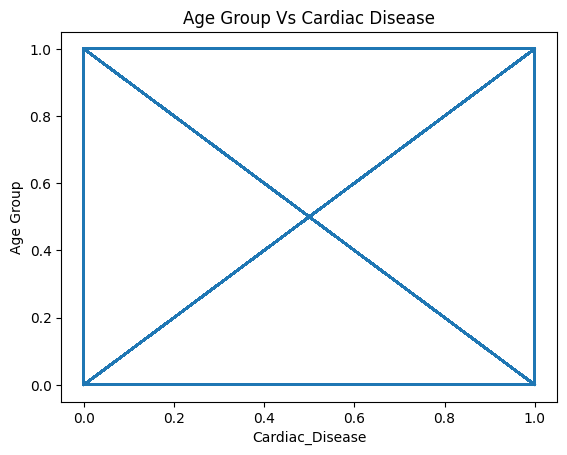

In [16]:
x=Dataset['Cardiac_Disease']
y=Dataset['Age_Group']
# set the chunksize parameter to 10000
# Since the number of data points in your plot exceeds the default limit set in the backend Agg.
# We can increase this limit by setting the agg.path.chunksize parameter in the rcParams dictionary to a larger value.
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(x,y)
plt.xlabel('Cardiac_Disease')
plt.ylabel('Age Group')
plt.title('Age Group Vs Cardiac Disease')
plt.show()

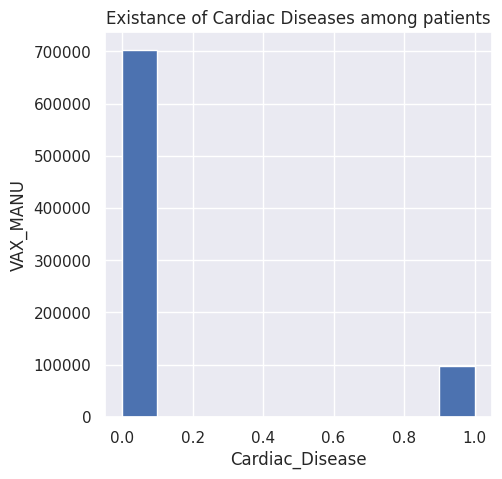

In [ ]:

x_axis = Dataset['Cardiac_Disease']
y_axis = Dataset['VAX_MANU']
plt.figure(figsize=(5,5))
plt.hist(x_axis)
plt.xlabel('Cardiac_Disease')
plt.ylabel('VAX_MANU')
plt.title('Existance of Cardiac Diseases among patients')

plt.show()

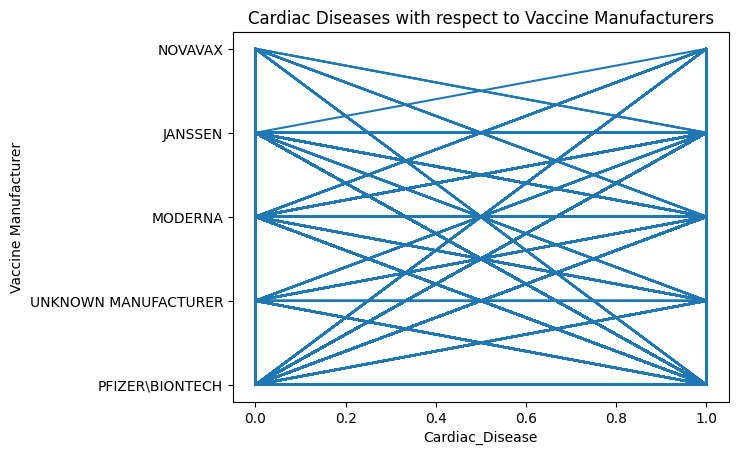

In [ ]:
x=Dataset['Cardiac_Disease']
y=Dataset['VAX_MANU']
plt.xlabel('Cardiac_Disease')
plt.ylabel('Vaccine Manufacturer')
plt.title('Cardiac Diseases with respect to Vaccine Manufacturers')
plt.plot(x,y)
plt.show()

In [17]:
def Vaccine_Manufacturer(VAX_MANU):
  if VAX_MANU == 'NOVAVAX':
    return "1"
  if VAX_MANU == 'JANSSEN':
    return "2"
  if VAX_MANU == 'MODERNA':
    return "3"
  if VAX_MANU == 'UNKNOWN MANUFACTURER':
    return "4"
  if VAX_MANU == 'PFIZER\BIONTECH':
    return "5"

print(Vaccine_Manufacturer('NOVAVAX'))
print(Vaccine_Manufacturer('JANSSEN'))
print(Vaccine_Manufacturer('PFIZER\BIONTECH'))

1
2
5


# Append 'Vaccine Manufacture' column to dataset based on its Source data column 'Vax_Manu'.

In [18]:
#Without inclusion of 'Vax_Manu', column 'Vaccine Manufacturer' the result would throw error and cannot be added to dataset
Dataset['Vaccine_Manufacturer'] = Dataset['VAX_MANU'].apply(lambda x: Vaccine_Manufacturer(x))
Dataset['Vaccine_Manufacturer'].head(3)

0    5
1    5
2    5
Name: Vaccine_Manufacturer, dtype: object

In [19]:
DataFrame = Dataset[['Cardiac_Disease','Age_Group','Vaccine_Manufacturer']]
DataFrame.head(5)

,Cardiac_Disease,Age_Group,Vaccine_Manufacturer
0,0,1,5
1,0,0,5
2,0,1,5
3,0,1,5
4,0,1,5


# Naive Bayes Classification ML with 2Variables and 1Label

In [20]:

features = ['Age_Group','Vaccine_Manufacturer']
label = ['Cardiac_Disease']

x, y = DataFrame[features].values,DataFrame[label].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets (70:30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = classifier.predict(x_test)

# Print the number of training and test cases
print('Training cases:', x_train.shape[0], '\nTest cases:', x_test.shape[0])
print(y_pred)
print("Naive Bayes score: ",classifier.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training cases: 560134 
Test cases: 240058
[0 0 0 ... 0 0 0]
Naive Bayes score:  0.8768797540594356


In [ ]:
# Making the Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)

[[210502      0]
 [ 29556      0]]


In [ ]:
# Making the Confusion Matrix for Training Data
from sklearn.metrics import confusion_matrix

# Generate the predicted labels for the training data
y_pred_train = classifier.predict(x_train)

# Generate the confusion matrix for the training data
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[491342      0]
 [ 68792      0]]


#Linear Regression Model - Binary Classification Model with One Vs One (Manufacturer Vs Cardiac Disease)

In [22]:
features = ['Vaccine_Manufacturer']
label = ['Cardiac_Disease']

X, Y = DataFrame[features].values,DataFrame[label].values

In [23]:
#Split data into 70:30

from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70:30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0],X_test.shape[0]))

Training cases: 560134
Test cases: 240058


In [24]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, Y_train)
print (model)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100.0, solver='liblinear')


In [25]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,Y_test)

Predicted labels:  [0 0 0 ... 0 0 0]
Actual labels:     [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [26]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Y_test, predictions))

Accuracy:  0.8768797540594356


In [27]:
from sklearn. metrics import classification_report

print(classification_report(Y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    210502
           1       0.00      0.00      0.00     29556

    accuracy                           0.88    240058
   macro avg       0.44      0.50      0.47    240058
weighted avg       0.77      0.88      0.82    240058



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Predict the test data model
Y_scores = model.predict_proba(X_test)
print(Y_scores)

[[0.86077171 0.13922829]
 [0.86077171 0.13922829]
 [0.90291824 0.09708176]
 ...
 [0.86077171 0.13922829]
 [0.89031446 0.10968554]
 [0.86077171 0.13922829]]


In [29]:
#Calculate Precision, Recall
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(Y_test, predictions))
print("Overall Recall:",recall_score(Y_test, predictions))

Overall Precision: 0.0
Overall Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


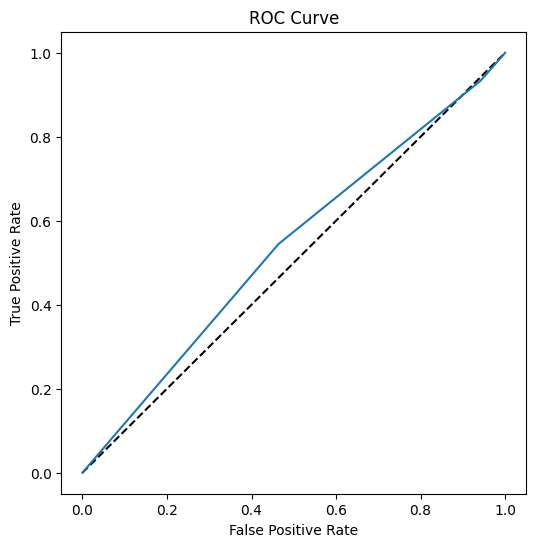

In [30]:
# Calculate ROC, Confusion Matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [31]:
#Calculate AUC Score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_test,Y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.5356642423168207


In [32]:
#Dump the ML model and save it for future/Real world predictions
import joblib

# Save the model as a pickle file
filename = './COVID19_model.ds16'
joblib.dump(model, filename)

['./COVID19_model.ds16']

In [ ]:
# Real World Prediction to be used on Cloud
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample for 1 patient
# Feature :- Vaccine Manufacturer = 1 (NOVAVAX)

X_new = np.array([[1]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted for the patient.
print('Predicted class is {}'.format(pred[0]))

New sample: [1]
Predicted class is 0


In [39]:
#Feature 2 =JANSSEN
model = joblib.load(filename)
X1_new = np.array([[2]])
print ('New sample: {}'.format(list(X1_new[0])))
pred = model.predict(X_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [2]
Predicted class is 0


In [40]:
#Feature 3 = Moderna
model = joblib.load(filename)
X1_new = np.array([[3]])
print ('New sample: {}'.format(list(X1_new[0])))
pred = model.predict(X_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [3]
Predicted class is 0


In [41]:
model = joblib.load(filename)
X1_new = np.array([[4]])
print ('New sample: {}'.format(list(X1_new[0])))
pred = model.predict(X_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [4]
Predicted class is 0


In [42]:
#Feature 5= PFIZER\BIONTECH
model = joblib.load(filename)
X1_new = np.array([[5]])
print ('New sample: {}'.format(list(X1_new[0])))
pred = model.predict(X_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [5]
Predicted class is 0
